<a href="https://colab.research.google.com/github/PauloHTFKobe1992/Challenge-Data-Science/blob/main/Teste_analise_falha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando biblioteca que calcula acuracia


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# CRIANDO AS VARIAVEIS DE TESTE E TREINO

In [ ]:
base = pd.read_csv('/content/full_devices.csv', encoding='latin-1')
display(base)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [ ]:
base.shape

(124494, 12)

#Correlação dos atributos com a base de falha

In [ ]:
base.corr().round(4)

<ipython-input-27-0a04a6185fd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base.corr().round(4)


,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.0000,0.0020,0.0529,-0.0009,0.0674,0.0023,-0.0006,0.1191,0.1191,0.0016
attribute1,0.0020,1.0000,-0.0042,0.0037,0.0018,-0.0034,-0.0015,0.0002,0.0002,0.0011
attribute2,0.0529,-0.0042,1.0000,-0.0026,0.1466,-0.0140,-0.0263,0.1414,0.1414,-0.0027
attribute3,-0.0009,0.0037,-0.0026,1.0000,0.0975,-0.0067,0.0090,-0.0019,-0.0019,0.5324
attribute4,0.0674,0.0018,0.1466,0.0975,1.0000,-0.0098,0.0249,0.0456,0.0456,0.0361
attribute5,0.0023,-0.0034,-0.0140,-0.0067,-0.0098,1.0000,-0.0170,-0.0094,-0.0094,0.0059
attribute6,-0.0006,-0.0015,-0.0263,0.0090,0.0249,-0.0170,1.0000,-0.0122,-0.0122,0.0212
attribute7,0.1191,0.0002,0.1414,-0.0019,0.0456,-0.0094,-0.0122,1.0000,1.0000,0.0069
attribute8,0.1191,0.0002,0.1414,-0.0019,0.0456,-0.0094,-0.0122,1.0000,1.0000,0.0069
attribute9,0.0016,0.0011,-0.0027,0.5324,0.0361,0.0059,0.0212,0.0069,0.0069,1.0000


In [ ]:
x = base[['attribute7', 'attribute8']]
 #[['attribute1','attribute2', 'attribute3','attribute4','attribute5','attribute6', 'attribute7', 'attribute8', 'attribute9']]
x

,attribute7,attribute8
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
124489,8,8
124490,0,0
124491,0,0
124492,0,0


In [ ]:
x = x.fillna(0)

In [ ]:
x

,attribute7,attribute8
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
124489,8,8
124490,0,0
124491,0,0
124492,0,0


In [ ]:
y = base['failure']
y

0         0
1         0
2         0
3         0
4         0
         ..
124489    0
124490    0
124491    0
124492    0
124493    0
Name: failure, Length: 124494, dtype: int64

In [ ]:
model = LinearSVC()
model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC()

In [ ]:

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.30,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 87145 elementos e testaremos com 37349 elementos
A acurácia foi 99.91%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acurácia: 0.9992770794007791
Matriz de Confusão:
[[24881     0]
 [   18     0]]


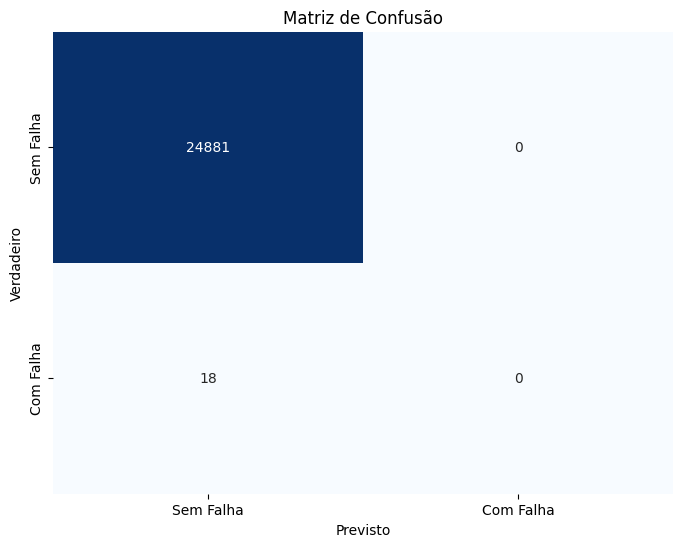

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Seus dados (substitua pelos seus próprios dados)
# ...

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inicializando e treinando o modelo (substitua pelo seu próprio modelo)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Criando uma matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n{conf_matrix}')

# Plotando a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Sem Falha', 'Com Falha'], yticklabels=['Sem Falha', 'Com Falha'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# ... (seu código anterior)

# Aplicando custos à matriz de confusão
false_positive_cost = 0.5  # custo para falsos positivos
false_negative_cost = 1.0  # custo para falsos negativos

weighted_conf_matrix = conf_matrix.copy()
weighted_conf_matrix[0, 1] *= false_positive_cost  # Falsos positivos
weighted_conf_matrix[1, 0] *= false_negative_cost  # Falsos negativos

# Calculando custos totais
prevention_cost = np.sum(weighted_conf_matrix[0, :])
maintenance_cost = np.sum(weighted_conf_matrix[1, :])

# Apresentando os custos em uma string
result_string = (
    f"Com esse modelo:\n"
    f"- {conf_matrix[0, 0]} dados estão sem falha e terão custo de R${prevention_cost:.2f} de prevenção.\n"
    f"- {conf_matrix[1, 1]} modelos estão com falha e terão custo de R${maintenance_cost:.2f} de manutenção."
)

print(result_string)


Com esse modelo:
- 24881 dados estão sem falha e terão custo de R$24881.00 de prevenção.
- 0 modelos estão com falha e terão custo de R$18.00 de manutenção.
